In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import matplotlib.colors as colors
import lasio
import seaborn as sns; sns.set()
%matplotlib inline

In [3]:
wellProd = pd.read_csv("Data/well production.csv")
fileNames = wellProd["well name"]
wellDFs = [pd.read_csv("Data/" + el + ".csv") for el in fileNames]

In [4]:
wellOutput=pd.read_csv("Data/well production.csv")
importantData=wellOutput.iloc[:,0:1]
oilSubset=wellOutput.iloc[:,4:16]
oilSubset2=wellOutput.iloc[:,17:29]
importantData['totalOil'] = oilSubset.sum(axis=1)
importantData['totalWater'] = oilSubset2.sum(axis=1)
importantData

/u/mgiordan/anaconda3/envs/energyanalytics/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/u/mgiordan/anaconda3/envs/energyanalytics/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,well name,totalOil,totalWater
0,Peak 6-217H,6808.0,4378.0
1,Tarragon 4-119H,1968.0,873.0
2,Fennel 10-129H,736.0,298.0
3,Federal 14-113H,2204.0,1093.0
4,King 7-184H,490.0,7.0
...,...,...,...
95,Pole 11-4H,7605.0,6839.0
96,Burger 6-148H,315.0,9.0
97,King 14-184H,8279.0,7227.0
98,Tribal 14-4H,2780.0,1501.0


In [5]:
eastings = [el.easting for el in wellDFs]
northings = [el.northing for el in wellDFs]
porosities = [el.porosity for el in wellDFs]
wSaturations = [el["water saturation"] for el in wellDFs]

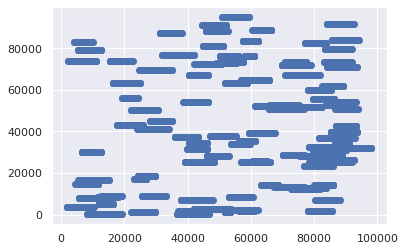

In [6]:
plt.scatter(eastings,northings)

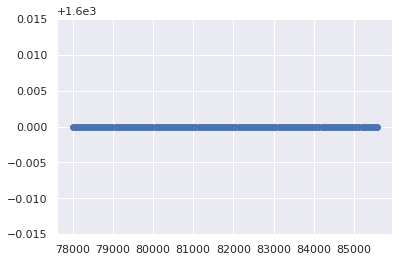

In [6]:
plt.scatter(eastings[0],northings[0])

In [112]:
oils = np.array([wellProd["oil " + str(i+1)] for i in range(12)])
oilPerPoint = [oils[i] / len(eastings[i]) for i in range(len(oils))]
oilPerPoint;
totalOil = [oil.sum() for oil in oils]

rfs = wellProd["recovery factor"]
oils


oils = wellProd["oil 1"]
oilPerPoint = [oils[i] / len(eastings[i]) for i in range(len(oils))]
np.array(oilPerPoint)*100

array([ 862.,  228.,   67.,  256.,   23.,   62.,  320.,  168.,  213.,
         88.,  279.,  164.,   50.,  120.,   15.,   99.,  419.,  306.,
         22.,  294.,  289.,  113.,  374.,  196.,  116.,  559.,   41.,
        353.,   41.,  282.,  139.,   82.,  127.,   35.,  234.,  147.,
        115.,    9.,   49.,   92.,  196.,  192.,  122.,  176.,  982.,
        414.,  297.,   73.,  228.,  107.,   20.,    8.,   94.,   51.,
         18.,   28.,  175.,  132.,   29.,  318.,  157.,  106.,   54.,
         83.,  374.,  157.,  480.,  167.,  124.,   83.,  262.,  327.,
        151.,  506.,  240.,  153.,   73.,   49.,   13.,   30.,   64.,
        378.,  100.,  162.,   54.,   79.,    5.,  113.,  122.,  116.,
        115.,  151.,   97.,  314.,  120.,  981.,    5., 1053.,  332.,
        542.])

In [113]:
important = pd.DataFrame(np.array([np.array(eastings).flatten(), np.array(northings).flatten(), (np.array(oilPerPoint)*100).repeat(len(eastings))]).transpose())
important

,0,1,2
0,78000.0,1600.0,862.0
1,78076.0,1600.0,862.0
2,78153.0,1600.0,862.0
3,78229.0,1600.0,862.0
4,78306.0,1600.0,862.0
...,...,...,...
9995,68381.0,14400.0,542.0
9996,68434.0,14400.0,542.0
9997,68488.0,14400.0,542.0
9998,68541.0,14400.0,542.0


In [114]:
important = important.iloc[::25]

In [10]:
np.linspace([0,0],[1,1], 10)

array([[0.        , 0.        ],
       [0.11111111, 0.11111111],
       [0.22222222, 0.22222222],
       [0.33333333, 0.33333333],
       [0.44444444, 0.44444444],
       [0.55555556, 0.55555556],
       [0.66666667, 0.66666667],
       [0.77777778, 0.77777778],
       [0.88888889, 0.88888889],
       [1.        , 1.        ]])

In [128]:
X = np.array(important.iloc[:,0:2])
y = np.array(important.iloc[:,2])
#reg = LinearRegression().fit(X,y)

In [14]:
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
len(important)

400

In [444]:
svr = SVR(kernel='rbf', C=1, gamma="scale")

In [445]:
svr.fit(X_train,y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [446]:
svr.score(X_test, y_test)

0.7677389294386247

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [.001, 0.01, 0.1, 1, 100, 1000],
            'epsilon': [.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [.0001, 0.001, 0.005, 0.1, 1, 3, 5, "scale", "auto"]
        },
        cv=5, 
    scoring='r2',
    verbose=0, n_jobs=-1)
  
# fitting the model for grid search 
gsc.fit(X_train, y_train)
print(gsc.best_params_)
svr = gsc
gsc.score(X_test, y_test)

{'C': 1, 'epsilon': 0.1, 'gamma': 'scale'}


0.4367757356480907

In [15]:
import keras
from keras.layers import Dense
model = keras.Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='softmax'))
optimizer = keras.optimizers.RMSprop(lr=1e-6)
model.compile(optimizer=optimizer, loss = "mean_squared_error")

Using TensorFlow backend.
/u/mgiordan/anaconda3/envs/energyanalytics/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/u/mgiordan/anaconda3/envs/energyanalytics/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/u/mgiordan/anaconda3/envs/energyanalytics/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

KeyboardInterrupt: 

In [589]:
model.fit(X, y, epochs=500)

Epoch 1/500
10000/10000 [==============================] - 5s 547us/step - loss: 3198574818.9184
Epoch 2/500
10000/10000 [==============================] - 1s 67us/step - loss: 3174082825.4208
Epoch 3/500
10000/10000 [==============================] - 1s 63us/step - loss: 3149702116.5568
Epoch 4/500
10000/10000 [==============================] - 1s 65us/step - loss: 3125458744.9344
Epoch 5/500
10000/10000 [==============================] - 1s 67us/step - loss: 3101344026.2144
Epoch 6/500
10000/10000 [==============================] - 1s 64us/step - loss: 3077346161.0496
Epoch 7/500
10000/10000 [==============================] - 1s 67us/step - loss: 3053375852.5440
Epoch 8/500
10000/10000 [==============================] - 1s 61us/step - loss: 3029663260.2624
Epoch 9/500
10000/10000 [==============================] - 1s 64us/step - loss: 3006070007.8080
Epoch 10/500
10000/10000 [==============================] - 1s 93us/step - loss: 2982431875.4816
Epoch 11/500
10000/10000 [============

KeyboardInterrupt: 

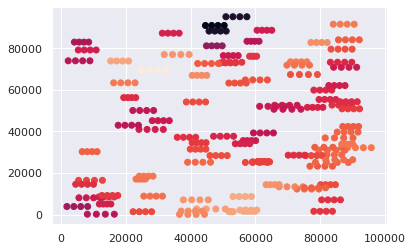

In [12]:
plt.scatter(X[:,0],X[:,1], c=y)

Train on 360 samples, validate on 40 samples
Epoch 1/400
360/360 [==============================] - 0s 521us/step - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.1948 - val_mean_squared_error: 0.1948
Epoch 2/400
360/360 [==============================] - 0s 16us/step - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1853 - val_mean_squared_error: 0.1853
Epoch 3/400
360/360 [==============================] - 0s 18us/step - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1764 - val_mean_squared_error: 0.1764
Epoch 4/400
360/360 [==============================] - 0s 18us/step - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.1681 - val_mean_squared_error: 0.1681
Epoch 5/400
360/360 [==============================] - 0s 22us/step - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.1603 - val_mean_squared_error: 0.1603
Epoch 6/400
360/360 [==============================] - 0s 16us/step - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.1532 - v

360/360 [==============================] - 0s 20us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.1118 - val_mean_squared_error: 0.1118
Epoch 51/400
360/360 [==============================] - 0s 19us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.1117 - val_mean_squared_error: 0.1117
Epoch 52/400
360/360 [==============================] - 0s 16us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.1117 - val_mean_squared_error: 0.1117
Epoch 53/400
360/360 [==============================] - 0s 19us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.1112 - val_mean_squared_error: 0.1112
Epoch 54/400
360/360 [==============================] - 0s 21us/step - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.1110 - val_mean_squared_error: 0.1110
Epoch 55/400
360/360 [==============================] - 0s 22us/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.1109 - val_mean_squared_error: 0.1109
Epoch 56/400
360/360 [=

Epoch 100/400
360/360 [==============================] - 0s 19us/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0985 - val_mean_squared_error: 0.0985
Epoch 101/400
360/360 [==============================] - 0s 18us/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0977 - val_mean_squared_error: 0.0977
Epoch 102/400
360/360 [==============================] - 0s 23us/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0972 - val_mean_squared_error: 0.0972
Epoch 103/400
360/360 [==============================] - 0s 16us/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0973 - val_mean_squared_error: 0.0973
Epoch 104/400
360/360 [==============================] - 0s 16us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0975 - val_mean_squared_error: 0.0975
Epoch 105/400
360/360 [==============================] - 0s 17us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0976 - val_mean_squared_error: 0.0976
Epoc

360/360 [==============================] - 0s 21us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0816 - val_mean_squared_error: 0.0816
Epoch 150/400
360/360 [==============================] - 0s 16us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0820 - val_mean_squared_error: 0.0820
Epoch 151/400
360/360 [==============================] - 0s 19us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0829 - val_mean_squared_error: 0.0829
Epoch 152/400
360/360 [==============================] - 0s 22us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0811 - val_mean_squared_error: 0.0811
Epoch 153/400
360/360 [==============================] - 0s 15us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0810 - val_mean_squared_error: 0.0810
Epoch 154/400
360/360 [==============================] - 0s 17us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0815 - val_mean_squared_error: 0.0815
Epoch 155/400
360/

360/360 [==============================] - 0s 17us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0659 - val_mean_squared_error: 0.0659
Epoch 199/400
360/360 [==============================] - 0s 17us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0640 - val_mean_squared_error: 0.0640
Epoch 200/400
360/360 [==============================] - 0s 26us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0643 - val_mean_squared_error: 0.0643
Epoch 201/400
360/360 [==============================] - 0s 20us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0661 - val_mean_squared_error: 0.0661
Epoch 202/400
360/360 [==============================] - 0s 18us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0656 - val_mean_squared_error: 0.0656
Epoch 203/400
360/360 [==============================] - 0s 18us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0650 - val_mean_squared_error: 0.0650
Epoch 204/400
360/

360/360 [==============================] - 0s 16us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0517 - val_mean_squared_error: 0.0517
Epoch 248/400
360/360 [==============================] - 0s 18us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 249/400
360/360 [==============================] - 0s 18us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 250/400
360/360 [==============================] - 0s 17us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 251/400
360/360 [==============================] - 0s 19us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0509 - val_mean_squared_error: 0.0509
Epoch 252/400
360/360 [==============================] - 0s 17us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 253/400
360/

360/360 [==============================] - 0s 23us/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0374 - val_mean_squared_error: 0.0374
Epoch 297/400
360/360 [==============================] - 0s 25us/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 298/400
360/360 [==============================] - 0s 22us/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 299/400
360/360 [==============================] - 0s 23us/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 300/400
360/360 [==============================] - 0s 23us/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 301/400
360/360 [==============================] - 0s 25us/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0374 - val_mean_squared_error: 0.0374
Epoch 302/400
360/

360/360 [==============================] - 0s 18us/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 346/400
360/360 [==============================] - 0s 19us/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 347/400
360/360 [==============================] - 0s 22us/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 348/400
360/360 [==============================] - 0s 20us/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 349/400
360/360 [==============================] - 0s 27us/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 350/400
360/360 [==============================] - 0s 15us/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 351/400
360/

360/360 [==============================] - 0s 21us/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 395/400
360/360 [==============================] - 0s 27us/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0217 - val_mean_squared_error: 0.0217
Epoch 396/400
360/360 [==============================] - 0s 17us/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 397/400
360/360 [==============================] - 0s 17us/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 398/400
360/360 [==============================] - 0s 22us/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 399/400
360/360 [==============================] - 0s 23us/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 400/400
360/

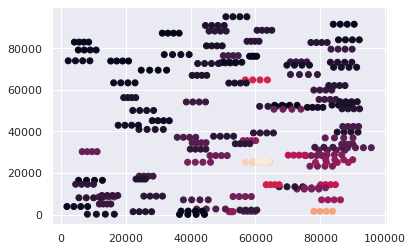

In [116]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.layers import Dense
plt.scatter(X[:,0],X[:,1], c=y)

scalar2 = MinMaxScaler()
scalar2.fit(X)
Xfit = scalar2.transform(X)
scalar = MinMaxScaler()
scalar.fit(y.reshape(-1,1))
yfit = scalar.transform(y.reshape(-1,1)).reshape(-1)

X = Xfit
y = yfit

# Definition of our model
model = keras.Sequential() # as first layer in a sequential model:
# let's define our first model (there is still room from creativity here)
model.add( keras.layers.Dense( units=30, input_shape=(2,), activation="relu" ) )
#model.add( keras.layers.Dropout(rate=0.2),)
model.add( keras.layers.Dense( units=15, input_shape=(30,), activation="relu" ) )
model.add( keras.layers.Dense( units=15, input_shape=(15,), activation="relu" ) )
model.add( keras.layers.Dense( units=1, input_shape=(15,), activation="linear" ) )
optimizer = keras.optimizers.Adam()#lr=1e-6) rmsprop
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
model.fit(X, y, epochs=400, verbose=1, batch_size=200, validation_split = 0.1)

In [130]:
scalar.inverse_transform(cost)

array([[  9.871253 ,   7.8420014,   2.3074515, ..., 892.0079   ,
        908.71716  , 925.4266   ],
       [ 46.982986 ,  41.119217 ,  40.412865 , ..., 838.5068   ,
        855.21594  , 871.9253   ],
       [ 66.54529  ,  69.25562  ,  77.649574 , ..., 781.5928   ,
        799.0488   , 816.505    ],
       ...,
       [ 13.982078 ,   4.404346 ,  -5.173197 , ...,  78.780594 ,
         76.146286 ,  73.51198  ],
       [  7.8557634,  -1.7220799, -11.29963  , ...,  81.201515 ,
         78.5672   ,  75.932915 ],
       [  1.7293338,  -7.8483047, -17.42594  , ...,  83.622406 ,
         80.98813  ,  78.35383  ]], dtype=float32)

In [1]:
model.predict(X).reshape(-1)-y

NameError: name 'model' is not defined

In [611]:
model.predict(X[0:1])

array([[2.5982442]], dtype=float32)

In [ ]:
#allX = np.array([np.arange(min(X[:,i]),max(X[:,i]), 1000) for i in range(len(X[0]))])

In [ ]:
#cool = np.array(np.meshgrid(allX[0], allX[1])).transpose().reshape(-1, 2);

In [ ]:
#yPred = reg.predict(cool)

In [118]:
testX0 = np.linspace(min(X[:,0]), max(X[:,0]), 50)
testX1 = np.linspace(min(X[:,1]), max(X[:,1]), 50)
grid0, grid1 = np.meshgrid(testX0, testX1)
cost = np.array([model.predict(np.array([grid0[i], grid1[i]]).transpose()).reshape(-1) for i in range(len(grid0))])

In [119]:
#np.array([testX0, testX1]).transpose()
reset = scalar2.inverse_transform(np.array([testX0, testX1]).transpose())
testX00 = reset[:,0]
testX01 = reset[:,1]

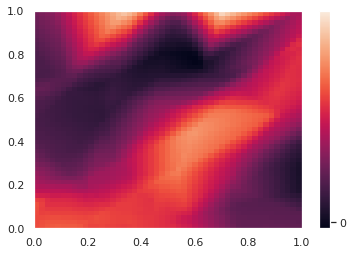

In [60]:
plt.pcolormesh(grid0,grid1,cost, norm=colors.SymLogNorm(linthresh=10, linscale=1,
                                              vmin=cost.min(), vmax=cost.max()))
cbar = plt.colorbar()

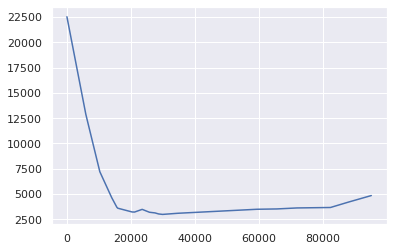

In [131]:
ls = np.linspace(min(X[:,1]), max(X[:,1]), 1000)
plt.plot(ls, model.predict(np.array([np.array(80000).repeat(len(ls)), ls]).transpose()).reshape(-1))

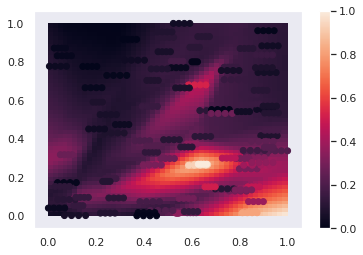

In [120]:
plt.pcolormesh(grid0,grid1,cost, norm=colors.SymLogNorm(linthresh=10, linscale=1,
                                              vmin=cost.min(), vmax=cost.max()))
plt.scatter(X[:,0], X[:,1], c = y)
plt.colorbar()

In [656]:
biggest = important.loc[important.iloc[:,2] > 10]
np.array(biggest.iloc[:,0])[0]
svr.predict([[np.array(biggest.iloc[:,0])[0], np.array(biggest.iloc[:,1])[0]]])[0]

ValueError: Error when checking input: expected dense_235_input to have shape (2,) but got array with shape (1,)

In [ ]:
import ipywidgets as widgets

In [ ]:
oilsAll = [wellProd["oil " + str(i+1)] for i in range(12)]

In [ ]:
@widgets.interact(w=(0,11,1))
def doItAll(w):
    oils = oilsAll[w]
    oilPerPoint = [oils[i] / len(eastings[i]) for i in range(len(oils))]
    y = np.array(oilPerPoint).repeat(len(eastings))
    plt.scatter(X[:,0], X[:,1], c = y)
    plt.colorbar()

In [ ]:
oilsT = [np.array(oilsAll)[:,i].sum() for i in range(len(oilsAll[0]))]
oilPerPoint = [oilsT[i] / len(eastings[i]) for i in range(len(oilsT))]
y = np.array(oilPerPoint).repeat(len(eastings))
plt.scatter(X[:,0], X[:,1], c = y)
plt.colorbar()

In [ ]:
[(eastings[i][1], northings[i][1]) for i in range(len(eastings))];